<Figure size 432x288 with 0 Axes>

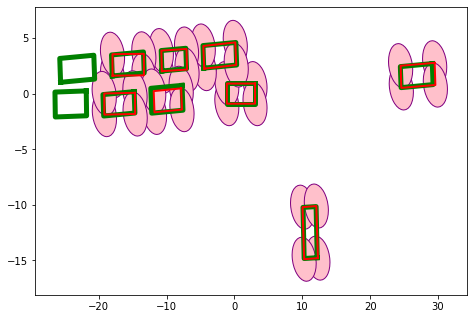

In [144]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import numpy as np

# specify the result path
box = np.load("/home/yml/Downloads/upperbound/result1/8_38.npy", allow_pickle=True).item()

#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
def confidence_ellipse(mean_x, mean_y, cov, ax, n_std=0.1, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
#     if x.size != y.size:
#         raise ValueError("x and y must be the same size")

#     cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
#     mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
#     mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------

plt.clf()
fig = plt.figure()
# fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0,0,1,1])

# plot the gt boxes
for k in range(box["groundtruth"].shape[0]):
    
    gt = np.concatenate((box["groundtruth"], np.expand_dims(box["groundtruth"][:, 0, :], axis=1)), axis=1)
    
    ax.plot(
        gt[k, :, 0],
        gt[k, :, 1],
        c="g",
        linewidth=5.0,
        zorder=20,
    )

# plot the prediction boxes
for k in range(box["mean"].shape[0]):
    
    corners = np.concatenate((box["mean"], np.expand_dims(box["mean"][:, 0, :], axis=1)), axis=1)
    
    ax.plot(
        corners[k, :, 0],
        corners[k, :, 1],
        c="r",
        linewidth=2.0,
        zorder=20,
    )

# plot the covariance
cov = box["covar"]

for i in range(box["mean"].shape[0]):
    for j in range(box["mean"].shape[1]):
        mean_x = box["mean"][i,j,0]
        mean_y = box["mean"][i,j,1]
        confidence_ellipse(mean_x, mean_y, cov[i,j], ax, n_std=1, facecolor='pink', edgecolor='purple')